# Linear Regression Model


In [155]:
import numpy as np
import pandas as pd
import io
from sklearn.linear_model import LinearRegression

## Without Train/Test split

### Data Preparation

In [156]:
csv_data = """
x1	x2	y
1	2	14
2	3	18
3	4	24
4	5	32
"""

In [157]:
csv_data

'\nx1\tx2\ty\n1\t2\t14\n2\t3\t18\n3\t4\t24\n4\t5\t32\n'

In [158]:
df = pd.read_csv(io.StringIO(csv_data), sep="\t")

In [159]:
df

,x1,x2,y
0,1,2,14
1,2,3,18
2,3,4,24
3,4,5,32


In [160]:
X = df[['x1','x2']]

In [161]:
X

,x1,x2
0,1,2
1,2,3
2,3,4
3,4,5


In [162]:
y = df[['y']]

In [163]:
y

,y
0,14
1,18
2,24
3,32


### Model

In [164]:
model = LinearRegression()
model.fit(X,y)

LinearRegression()

In [165]:
print(model.coef_,model.intercept_)

[[3. 3.]] [4.]


### Evaluation

In [166]:
y_pred = model.predict(X)

In [167]:
print(y,'\n',y_pred)

    y
0  14
1  18
2  24
3  32 
 [[13.]
 [19.]
 [25.]
 [31.]]


In [168]:
y-y_pred

,y
0,1.0
1,-1.0
2,-1.0
3,1.0


In [169]:
rmse = np.sqrt(((y-y_pred)**2).mean())

In [170]:
rmse

y    1.0
dtype: float64

In [171]:
X[['x1']]

,x1
0,1
1,2
2,3
3,4


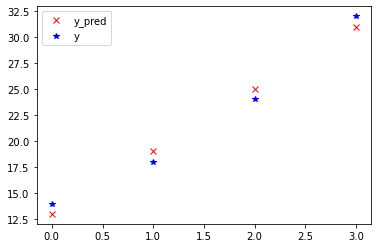

In [172]:
import matplotlib.pyplot as plt
plt.plot(y_pred,'xr',label='y_pred')
plt.plot(y,'*b',label='y')
plt.legend()

## With Train/Test split

### Data Preparaion

In [173]:
from sklearn.model_selection import train_test_split

In [174]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.25)


In [175]:
X_train, X_test, y_train, y_test

(   x1  x2
 3   4   5
 2   3   4
 1   2   3,
    x1  x2
 0   1   2,
     y
 3  32
 2  24
 1  18,
     y
 0  14)

In [176]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [177]:
y_pred = model.predict(X_test)
print(y_pred)

[[10.66666667]]


In [178]:
rmse = np.sqrt(((y_test-y_pred)**2).mean())
print(rmse)

y    3.333333
dtype: float64


In [179]:
rmse

y    3.333333
dtype: float64

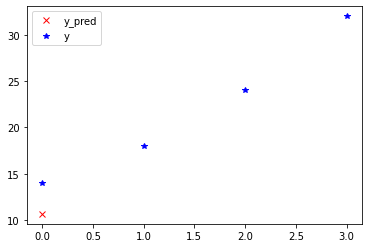

In [180]:
import matplotlib.pyplot as plt
plt.plot(y_pred,'xr',label='y_pred')
plt.plot(y,'*b',label='y')
plt.legend()

## K-Fold Cross-Validation

In [181]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=4, shuffle=True)
kf

KFold(n_splits=4, random_state=None, shuffle=True)

In [182]:
for train_index, test_index in kf.split(X):
    print('train_index',train_index)
    print('test_index',test_index)
    print("----------")

train_index [0 1 3]
test_index [2]
----------
train_index [1 2 3]
test_index [0]
----------
train_index [0 1 2]
test_index [3]
----------
train_index [0 2 3]
test_index [1]
----------


In [183]:
y.loc[train_index]

,y
0,14
2,24
3,32


In [184]:
y.loc[test_index]

,y
1,18


In [185]:
rmse_ = []
round = 0
for train_index, test_index in kf.split(X):
    X_train = X.loc[train_index]
    X_test = X.loc[test_index]
    y_train = y.loc[train_index]
    y_test = y.loc[test_index]

    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse = np.sqrt(((y_test-y_pred)**2).mean(),dtype=None)
    rmse_.append(rmse[0])
    print('Round :', round+1, '\nRMSE =', rmse_[round],'\n----------')
    round += 1


Round : 1 
RMSE = 1.4285714285714306 
----------
Round : 2 
RMSE = 3.3333333333333357 
----------
Round : 3 
RMSE = 3.333333333333327 
----------
Round : 4 
RMSE = 1.428571428571427 
----------


In [186]:
print('RMSE for 4 folds =',np.mean(rmse_))

RMSE for 4 folds = 2.38095238095238
